Descriptive Statistics:

         Feature_1    Feature_2    Feature_3
count  1000.000000  1000.000000  1000.000000
mean     50.948070    30.354181   100.116684
std      12.386766     4.987272    19.669086
min      17.587327    15.298057    39.609757
25%      43.604151    26.968792    87.040008
50%      50.292505    30.315386    99.994985
75%      56.594409    33.644411   113.218306
max     149.178360    45.965538   178.524754

Correlation Matrix:

           Feature_1  Feature_2  Feature_3
Feature_1   1.000000  -0.032163   0.016561
Feature_2  -0.032163   1.000000  -0.011199
Feature_3   0.016561  -0.011199   1.000000


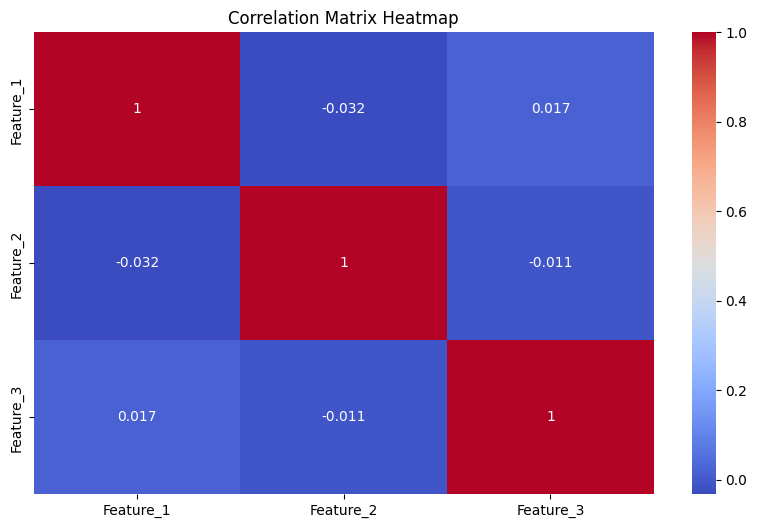


Outliers Detected using IQR Method:

      Feature_1  Feature_2   Feature_3
24          NaN        NaN   39.609757
35          NaN        NaN  155.193201
40   102.517476        NaN         NaN
61          NaN  15.757287         NaN
74    23.802549        NaN         NaN
101         NaN  15.518723         NaN
173  117.375940        NaN         NaN
179   77.201692        NaN         NaN
209   88.527315        NaN         NaN
262   17.587327        NaN         NaN
273  102.638263        NaN         NaN
305         NaN        NaN  162.198371
442  149.178360        NaN         NaN
478   80.788808        NaN         NaN
506         NaN        NaN  158.981889
521         NaN        NaN  159.705180
532  112.983542        NaN         NaN
539         NaN  15.638689         NaN
556         NaN        NaN   47.285045
591         NaN  15.393248         NaN
615         NaN  45.965538         NaN
636  121.561693        NaN         NaN
646   23.031134        NaN         NaN
668   23.490302        NaN

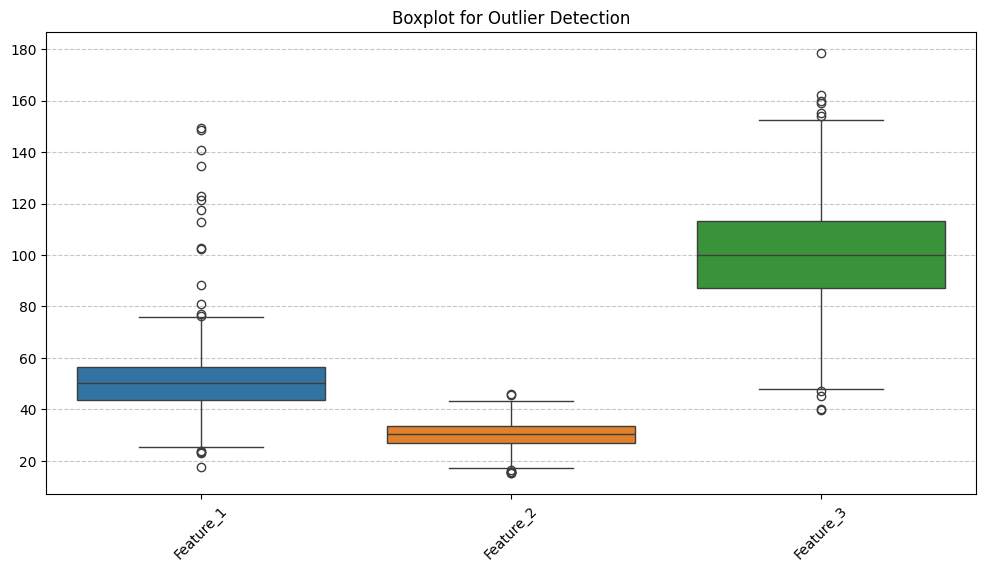

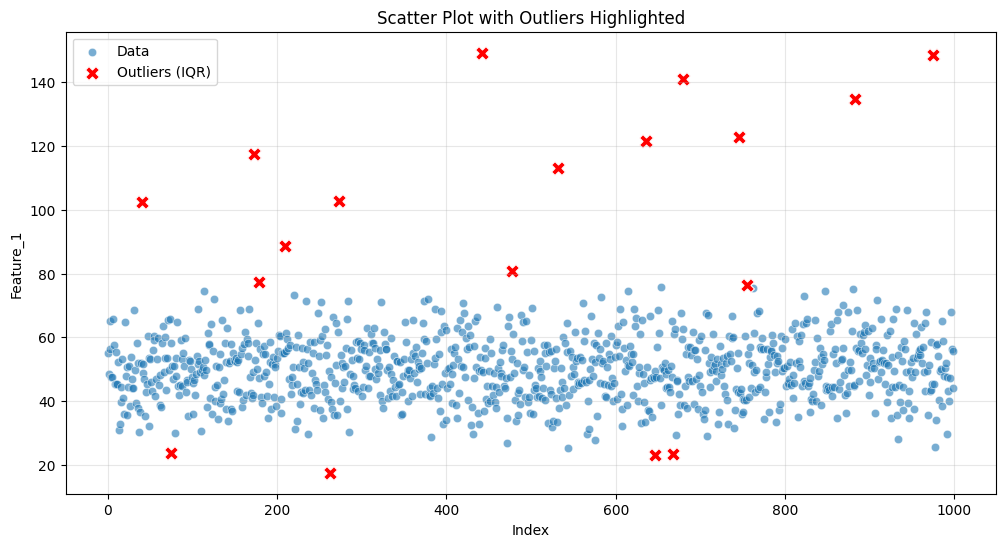

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    "Feature_1": np.random.normal(loc=50, scale=10, size=1000),
    "Feature_2": np.random.normal(loc=30, scale=5, size=1000),
    "Feature_3": np.random.normal(loc=100, scale=20, size=1000)
}

# Introduce outliers in Feature_1
data["Feature_1"][np.random.choice(1000, 10, replace=False)] = np.random.uniform(100, 150, 10)

# Create DataFrame
df = pd.DataFrame(data)

# Descriptive Statistics
print("Descriptive Statistics:\n")
print(df.describe())

# Correlation Matrix
print("\nCorrelation Matrix:\n")
print(df.corr())

# Plot Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Outlier Detection using IQR Method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Outlier Detection using Z-score Method
def detect_outliers_zscore(series, threshold=3):
    z_scores = zscore(series)
    return series[(np.abs(z_scores) > threshold)]

# Apply Outlier Detection
outliers_iqr = df.apply(detect_outliers_iqr)
outliers_zscore = df.apply(detect_outliers_zscore)

print("\nOutliers Detected using IQR Method:\n")
print(outliers_iqr.dropna(how='all'))

print("\nOutliers Detected using Z-score Method:\n")
print(outliers_zscore.dropna(how='all'))

# Visualization - Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization - Scatter Plot with Outliers Highlighted
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df["Feature_1"], label="Data", alpha=0.6)
sns.scatterplot(x=outliers_iqr.index, y=outliers_iqr["Feature_1"], label="Outliers (IQR)", color="red", marker="X", s=100)
plt.title("Scatter Plot with Outliers Highlighted")
plt.xlabel("Index")
plt.ylabel("Feature_1")
plt.grid(alpha=0.3)
plt.legend()
plt.show()